> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset (TMDb movies)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables. If you're not sure what questions to ask, then make sure you familiarize yourself with the dataset, its variables and the dataset context for ideas of what to explore.

> If you haven't yet selected and downloaded your data, make sure you do that first before coming back here. In order to work with the data in this workspace, you also need to upload it to the workspace. To do so, click on the jupyter icon in the upper left to be taken back to the workspace directory. There should be an 'Upload' button in the upper right that will let you add your data file(s) to the workspace. You can then click on the .ipynb file name to come back here.

>What kinds of properties are associated with movies that have high revenues?



In [2]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [3]:
# Load data and print out a few lines.
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [4]:
# print concise summery of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [5]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [6]:
# count total rows in each column which contain null values
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [7]:
# counting the duplicate elements
sum(df.duplicated())

1

In [8]:
# drop unwanted column/ rows, etc
df.drop(['cast','overview','tagline','keywords','production_companies','homepage','imdb_id'], axis=1, inplace=True)
# Remove Duplicate Rows
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)
df.isnull().sum()
df.head()

,id,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,110000000,295238201,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,190000000,1506249360,Furious 7,James Wan,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [9]:
# print concise summery of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10800 entries, 0 to 10865
Data columns (total 14 columns):
id                10800 non-null int64
popularity        10800 non-null float64
budget            10800 non-null int64
revenue           10800 non-null int64
original_title    10800 non-null object
director          10800 non-null object
runtime           10800 non-null int64
genres            10800 non-null object
release_date      10800 non-null object
vote_count        10800 non-null int64
vote_average      10800 non-null float64
release_year      10800 non-null int64
budget_adj        10800 non-null float64
revenue_adj       10800 non-null float64
dtypes: float64(4), int64(6), object(4)
memory usage: 1.2+ MB


In [10]:
# convertting columns to a proper type:
#Changing Format Of Release Date Into Datetime Format
df['release_date'] = pd.to_datetime(df['release_date'])
#Changing Format Of Budget  Into int Format
df['budget'] = df['budget'].astype(int)
#Changing Format Of id  Into str Format
df['id'] = df['id'].astype(str)

In [11]:
#filter budget column to exlude all zeros
df = df[df['budget'] > 0]
#testing column
df[df['budget']==0] 

,id,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.



In [12]:
#get insight on some columns:
def get_values_range(x):
    min_value=x.min()
    max_value=x.max()
    return(min_value,max_value)

In [13]:
get_values_range(df.release_year)

(1960, 2015)

In [14]:
get_values_range(df.budget)

(1, 425000000)

In [15]:
get_values_range(df.revenue)

(0, 2781505847)

### Question 1: What is the movie with lowest budget?

In [16]:
data = df.sort_values(['budget'], ascending = False)
data.loc[:,['original_title','director','release_date']].tail(1)

,original_title,director,release_date
1151,Fear Clinic,Robert Hall,2014-10-31


As we can see that 'Fear Clinic' movie Directed by Robert Hall has Lowest budget

### Question2 : What is the top 5 movies with highest budget?

In [17]:
data = df.sort_values(['budget'], ascending = False)
data.loc[:,['original_title','director','release_date','budget']].head(5)

,original_title,director,release_date,budget
2244,The Warrior's Way,Sngmoo Lee,2010-12-02,425000000
3375,Pirates of the Caribbean: On Stranger Tides,Rob Marshall,2011-05-11,380000000
7387,Pirates of the Caribbean: At World's End,Gore Verbinski,2007-05-19,300000000
14,Avengers: Age of Ultron,Joss Whedon,2015-04-22,280000000
6570,Superman Returns,Bryan Singer,2006-06-28,270000000


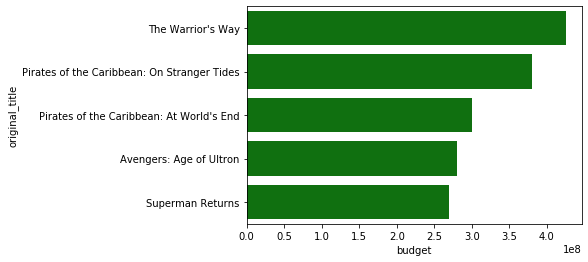

In [18]:
sns.set_color_codes("pastel")
sns.barplot(x="budget", y = "original_title", data = df.sort_values(['budget'], ascending = False).head(5), 
            color="green");

In [19]:
data.budget.head(5)

2244    425000000
3375    380000000
7387    300000000
14      280000000
6570    270000000
Name: budget, dtype: int64

As we can see the top 5 highest budget movies are:
1. The Warrior's Way directed by Sngmoo Lee with budget 425000000
2. Pirates of the Caribbean: On Stranger Tides directed by Rob Marshall with budget 380000000
3. Pirates of the Caribbean: At World's End directed by Gore Verbinski with budget 300000000
4. Avengers: Age of Ultron, directed by Joss Whedon with budget 280000000
5. Superman Returns, directed by Bryan Singer, with budget 270000000

### Question3: What are the top 5 movies with highest profit?



In [20]:
df['profit'] = df['revenue'] - df['budget']

In [21]:
data = df.sort_values(['profit'], ascending = False)
data.loc[:,['original_title','director','release_date','profit']].head(5)

,original_title,director,release_date,profit
1386,Avatar,James Cameron,2009-12-10,2544505847
3,Star Wars: The Force Awakens,J.J. Abrams,2015-12-15,1868178225
5231,Titanic,James Cameron,1997-11-18,1645034188
0,Jurassic World,Colin Trevorrow,2015-06-09,1363528810
4,Furious 7,James Wan,2015-04-01,1316249360


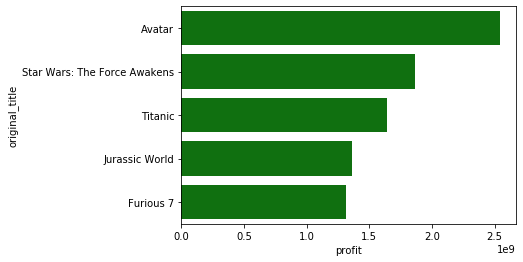

In [22]:
sns.set_color_codes("pastel")
sns.barplot(x="profit", y = "original_title", data = df.sort_values(['profit'], ascending = False).head(5),
            color="green");

As we can see the top 5 highest profit movies are:
1. Avatar directed by James Cameron 2544505847
2. Star Wars: The Force Awakens directed by J.J. Abrams with profit 1868178225
3. Titanic directed byJames Cameron with profit 1645034188
4. Jurassic World directed by Colin Trevorrow with profit 1363528810
5. Furious 7 directed by James Wan with profit 1316249360


# Conclusions
The data Movies shows many features for each movie from 1960 until 2015.
The limitations of these dataset are; the budget and revenue columns did not have currency unit. many rows are dropped couse of missing values.

